# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

import PIL.Image as Image

In [2]:
import os
os.getcwd()

'D:\\Data\\PyCharmProjects\\mnist-classifier'

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
# transform = transforms.Compose([transforms.ToTensor(), 
#                                 # transforms.Grayscale(num_output_channels=1),
#                                 transforms.Normalize((0.5,), (0.5,))
#                                ])
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Grayscale(num_output_channels=1),
                                transforms.Normalize((0.5,), (0.5,)),
                                transforms.Resize((28,28))
                               ])
transform

Compose(
    ToTensor()
    Grayscale(num_output_channels=1)
    Normalize(mean=(0.5,), std=(0.5,))
    Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
)

In [4]:
# Create training set and define training dataloader

training_data = datasets.MNIST(root="data", train=True, download=True, 
                               transform = transform)

test_data = datasets.MNIST(root="data", train=False, download=True,
                           transform = transform)

# Create test set and define test dataloader
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

In [5]:
# Print unique classes from the training dataset
classes = sorted(set(training_data.targets.numpy()))
print(f"Classes in MNIST dataset: {classes}")

Classes in MNIST dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

We have to transform the dataset for the following reasons:

    1. to convert the images to tenors that are multidimensional array.
    2. It makes training easy, saves us time and enable our model to generalize.
    3. Normalization enables us to ensure that no one image has superiority over others.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [7]:
training_data_view = datasets.MNIST(root="data", train=True, download=True, 
                               transform = ToTensor())

train_loader_view = DataLoader(training_data_view, batch_size=32, shuffle=True)

9


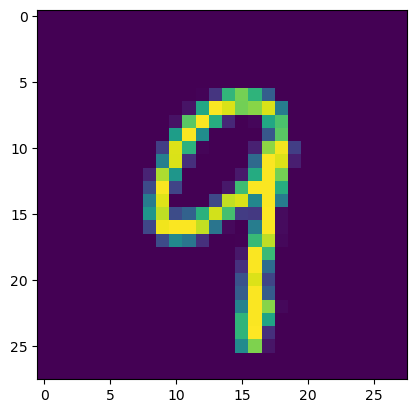

2


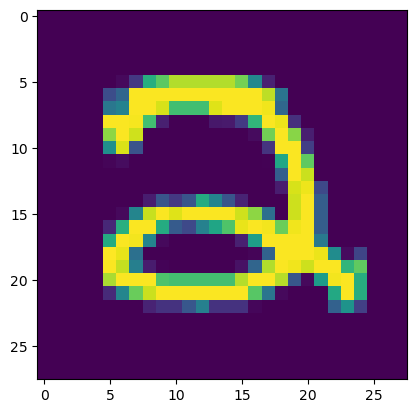

7


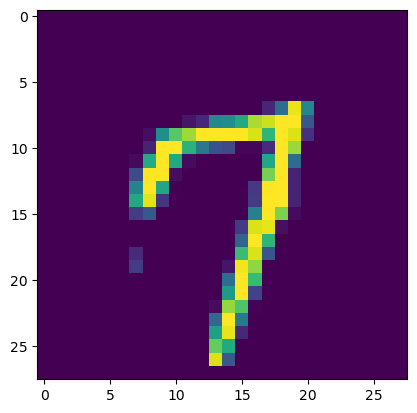

2


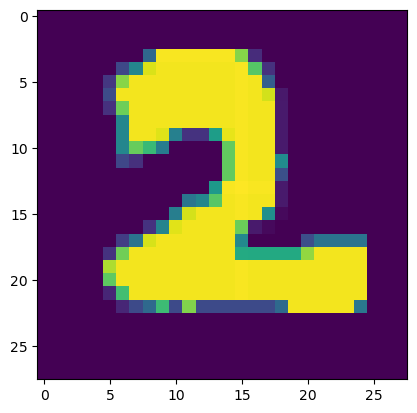

1


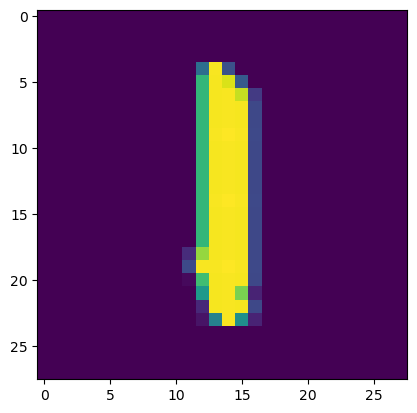

In [8]:
# Explore data
show5(train_loader_view)

In [9]:
for batch in train_loader_view:
    images_b, labels_b = batch
    print(images_b.shape)
    break

torch.Size([32, 1, 28, 28])


In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [11]:
len(training_data)

60000

In [12]:
# Define the class for the neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.ReLU() 
        self.layer1 = nn.Linear(28 * 28 * 1, 196)
        self.layer2 = nn.Linear(196, 96)
        self.layer3 = nn.Linear(96, 64)
        self.layer4 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x

In [13]:
# Instantiate the model
net = Net()
net.to(device)

Net(
  (activation): ReLU()
  (layer1): Linear(in_features=784, out_features=196, bias=True)
  (layer2): Linear(in_features=196, out_features=96, bias=True)
  (layer3): Linear(in_features=96, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters())

# Choose a loss function
# criterion = nn.MultiMarginLoss()
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [15]:
num_epochs = 20

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 0.89% training loss: 0.34726
Epoch 1 validation accuracy: 0.94% validation loss: 0.19133
Epoch 2 training accuracy: 0.95% training loss: 0.16280
Epoch 2 validation accuracy: 0.96% validation loss: 0.13571
Epoch 3 training accuracy: 0.96% training loss: 0.12640
Epoch 3 validation accuracy: 0.96% validation loss: 0.11817
Epoch 4 training accuracy: 0.97% training loss: 0.10221
Epoch 4 validation accuracy: 0.96% validation loss: 0.11502
Epoch 5 training accuracy: 0.97% training loss: 0.08956
Epoch 5 validation accuracy: 0.97% validation loss: 0.10909
Epoch 6 training accuracy: 0.97% training loss: 0.08057
Epoch 6 validation accuracy: 0.97% validation loss: 0.08125
Epoch 7 training accuracy: 0.98% training loss: 0.06937
Epoch 7 validation accuracy: 0.98% validation loss: 0.08025
Epoch 8 training accuracy: 0.98% training loss: 0.06508
Epoch 8 validation accuracy: 0.97% validation loss: 0.10111
Epoch 9 training accuracy: 0.98% training loss: 0.05787
Epoch 9 validati

Plot the training loss (and validation loss/accuracy, if recorded).

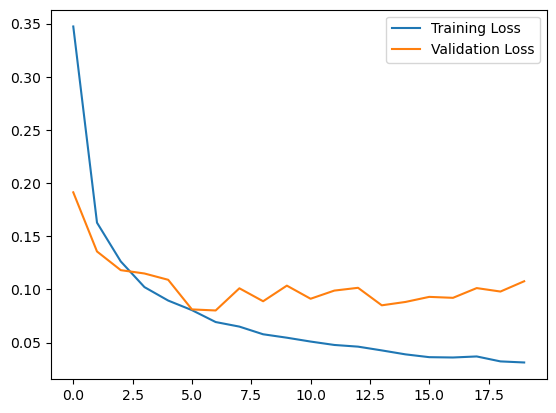

In [16]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
def evalaute_model(model, test_loader):
    model.eval()
    predicted_correctly = 0
    total = 0

    with torch.no_grad():
        for i, data in enumerate(test_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
    
            # Pass to GPU if available.
            inputs, labels = inputs.to(device), labels.to(device)

            total += labels.size(0)

            outputs = net(inputs)
            _, preds = torch.max(outputs.data, 1)

            predicted_correctly += (preds == labels).sum().item()

    epoch_acc = 100.0 * predicted_correctly / total
    print("Test data: The model got %d out of %d characters correctly %.3f%%"
          % (predicted_correctly, total, epoch_acc) )        

In [18]:
evalaute_model(net, test_loader)

Test data: The model got 9758 out of 10000 characters correctly 97.580%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

## Saving your model
Using `torch.save`, save your model for future loading.

In [19]:
# torch.save(net, 'neural_net_mnist_MultiMarginLoss.pth.tar')
torch.save(net, 'neural_net_mnist_CrossEntropyLoss.pth.tar')

# Test Model in Out of Sample Data

In [20]:
# define the classes
# classes =["1", "2", "3", "4" , "5", "6", "7", "8", "9", "0"]
classes =["zero", "one", "two", "three", "four" , "five", "six", "seven", "eight", "nine"]

In [21]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Grayscale(num_output_channels=1),
                                transforms.Normalize((0.5,), (0.5,)),
                                transforms.Resize((28,28))
                               ])
transform

Compose(
    ToTensor()
    Grayscale(num_output_channels=1)
    Normalize(mean=(0.5,), std=(0.5,))
    Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
)

## Visualize the data by applying transformation

In [38]:
img_path = "./oos data/zero.jpg"
image = Image.open(img_path)
image = transform(image)
image = image.numpy()
image = image.T.squeeze().T

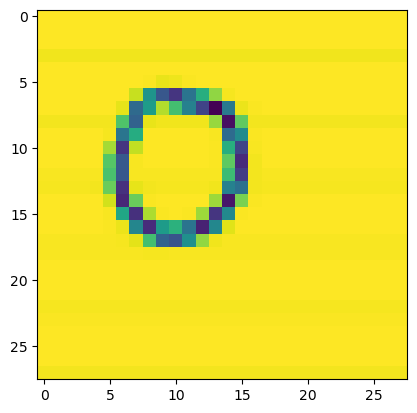

In [39]:
plt.imshow(image)
plt.show()

In [24]:
def classify(model, transformation, img_path, classes):
    model = model.eval()
    image = Image.open(img_path)
    image = transformation(image).float()
    image = image.unsqueeze(0)
    image = image.to(device)

    output = model(image)
    _, predicted = torch.max(output.data, 1)

    print(classes[predicted.item()])
    # print(predicted.item())

In [40]:
# classify(net, transform, "./oos data/eight.jpg", classes)
classify(net, transform, "./oos data/zero.jpg", classes)

eight
